**QUESTION : 1**

In [ ]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
from tensorflow.keras.preprocessing.image import load_img, img_to_array

2025-08-29 11:03:16.988721: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756465397.182235      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756465397.239513      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
train_dir = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train'
test_dir = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test'
classes = ['benign', 'malignant']
target_shape = (128, 128)

In [ ]:
# Load and preprocess image data
def load_data_from_directory(data_dir, classes, target_shape=(128, 128)):
    data = []
    labels = []

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.jpg'):
                file_path = os.path.join(class_dir, filename)
                # Load and preprocess the image
                img = load_img(file_path, target_size=target_shape)
                img_array = img_to_array(img)
                data.append(img_array)
                labels.append(i)

    return np.array(data), np.array(labels)

# Loading training and testing data
X_train, y_train = load_data_from_directory(train_dir, classes, target_shape)
X_test, y_test = load_data_from_directory(test_dir, classes, target_shape)

# Normalize pixel values to [0,1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=len(classes))
y_test = to_categorical(y_test, num_classes=len(classes))

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (9605, 128, 128, 3) (9605, 2)
Test set shape: (1000, 128, 128, 3) (1000, 2)


In [ ]:
#VGG19
# Define input shape
input_shape = X_train[0].shape

# Define the input layer
input_layer = Input(shape=input_shape)

# VGG19 Architecture (Custom Version)

# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Flatten and Fully Connected Layers
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
output_layer = Dense(len(classes), activation='softmax')(x)  # For multi-class classification

# Create
model = Model(inputs=input_layer, outputs=output_layer)

# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print
model.summary()

I0000 00:00:1756465451.498210      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    33,558,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,31

 Total params: 70,372,418 (268.45 MB)

 Trainable params: 70,372,418 (268.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,#number of iteration for dataset model train hbe
    batch_size=64,#koto gula image ek bare jay
    validation_data=(X_test, y_test)
)

# Evaluate the model on the test set
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy[1]}')

# Save the model
model.save('melanoma_vgg19_model.h5')
#dataset boro batch size boro

Epoch 1/20


I0000 00:00:1756465464.672448      80 service.cc:148] XLA service 0x79acac005100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756465464.673174      80 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1756465465.459020      80 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/151 ━━━━━━━━━━━━━━━━━━━━ 59:47 24s/step - accuracy: 0.4375 - loss: 0.6932

I0000 00:00:1756465481.129275      80 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


151/151 ━━━━━━━━━━━━━━━━━━━━ 67s 289ms/step - accuracy: 0.5160 - loss: 0.7410 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 194ms/step - accuracy: 0.5221 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 194ms/step - accuracy: 0.5218 - loss: 0.7122 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 194ms/step - accuracy: 0.5133 - loss: 0.7088 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 194ms/step - accuracy: 0.5238 - loss: 0.7373 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 194ms/step - accuracy: 0.5188 - loss: 0.7484 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 194ms/step - accuracy: 0.5090 - loss: 0.8037 - val_accuracy: 0.5000 - val_loss: 3.6793
Epoch 8/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 194ms/step - accuracy: 0.5332 - loss: 1.0342 - val

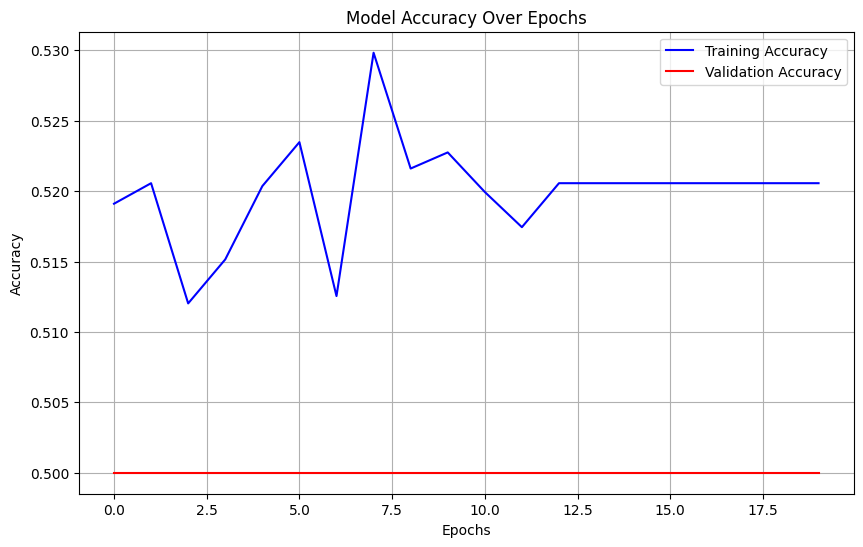

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Load the saved model
model = load_model('melanoma_vgg19_model.h5')

# Define the target shape for input images
target_shape = (128, 128)

# Define your class labels
classes = ['benign', 'malignant']

# Function to preprocess and classify an image file
def test_image(file_path, model):
    # Load and preprocess
    img = load_img(file_path, target_size=target_shape)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)

    #class probabilities
    class_probabilities = predictions[0]

    #predicted class index
    predicted_class_index = np.argmax(class_probabilities)

    return class_probabilities, predicted_class_index

test_image_file = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_10000.jpg'

class_probabilities, predicted_class_index = test_image(test_image_file, model)

for i, class_label in enumerate(classes):
    probability = class_probabilities[i]
    print(f'Class: {class_label}, Probability: {probability:.4f}')

predicted_class = classes[predicted_class_index]
print(f'The image is classified as: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Class: benign, Probability: 0.5213
Class: malignant, Probability: 0.4787
The image is classified as: benign


**Discussion:**

***Input Layer***
> Input It pushes the 128 x 128 x 3 image through the network.

***Convolutional Layers (Conv2D)***

> These layer apply very small filters to extract hierarchical characteristics in the photograph.Low-level stuff, edges, colors, textures, is picked up by the first few layers.The lower strata are collecting high-level content--patterns of shapes, lesions, melanomas.


***ReLU Activation***
> We introduce non-linearity in order to make the model able to learn more than merely straight lines.

***MaxPooling Layers***
> This reduces the size of the feature maps, retaining the significant bits, rendering the model less time-consuming and avoiding overfitting.

***Flatten Layer***
> Converts the two-dimensional feature maps to a one-dimensional vector in order to feed it into the fully connected layers.

***Dense with 4096 neurons Fully Connected Layers***
> They behave as the classifier, and they pull together the features that are extracted. These layers are trained to discriminate complex decision boundaries between benign and malignant.

***Output Layer (Softmax)***
> Gives a probability distribution of the two classes (benign vs malignant). A class that has the highest probability is the prediction.

*Why VGG-19 uses small filters (3×3)*
> VGG19 uses small 3x3 filters to go deeper and increase the complexity of the network without raising the number of parameters that allow it to better capture finer features than with a single large filter across the same receptive field. With multiple 3×3 convolutions, it obtains  additional non-linear transformations and a larger receptive field, thereby increasing the strength of the feature extraction and increasing its performance on large datasets.

**QUESTION: 2**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense,GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from sklearn.metrics import classification_report
from tensorflow.keras.applications.vgg19 import preprocess_input

In [ ]:
# Dataset path & classes

train_dir = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train'
test_dir = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test'
classes = ["benign", "malignant"]
target_shape = (224, 224)

# Function: Load and preprocess

def load_and_preprocess_data(data_dir, classes, target_shape=(224, 224)):
    data = []
    labels = []

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                file_path = os.path.join(class_dir, filename)
                img = load_img(file_path, target_size=target_shape)
                img_array = img_to_array(img)
                data.append(img_array)
                labels.append(i)

    return np.array(data), np.array(labels)

#Load data
X_train, y_train = load_data_from_directory(train_dir, classes, target_shape)
X_test, y_test = load_data_from_directory(test_dir, classes, target_shape)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


# Preprocess input for VGG/ResNet/Inception
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

# One-hot encoding
y_train = to_categorical(y_train, num_classes=len(classes))
y_test = to_categorical(y_test, num_classes=len(classes))

print("y_train sample:", y_train[0])

# Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)


Train set shape: (9605, 224, 224, 3) (9605,)
Test set shape: (1000, 224, 224, 3) (1000,)
y_train sample: [1. 0.]


In [ ]:
# VGG16 Model

vgg_16 = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze base model
for layer in vgg_16.layers:
    layer.trainable = False

# Add custom classifier
x = vgg_16.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(len(classes), activation="softmax")(x)

model_vgg = Model(inputs=vgg_16.input, outputs=predictions)

# Compile
model_vgg.compile(optimizer=Adam(learning_rate=0.0001),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

# Train
history_vgg = model_vgg.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=10,
    verbose=1
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 108s 327ms/step - accuracy: 0.7179 - loss: 0.9574 - val_accuracy: 0.9080 - val_loss: 0.2670
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 92s 305ms/step - accuracy: 0.8459 - loss: 0.4176 - val_accuracy: 0.9130 - val_loss: 0.2632
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 91s 301ms/step - accuracy: 0.8653 - loss: 0.3382 - val_accuracy: 0.9100 - val_loss: 0.2526
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 90s 300ms/step - accuracy: 0.8775 - loss: 0.3050 - val_accuracy: 0.9090 - val_loss: 0.2465
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 93s 307ms/step - accuracy: 0.8905 - loss: 0.2845 - val_accuracy: 0.9110 - val_loss: 0.2491
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 91s 301ms/step - accuracy: 0.8973 - loss: 0.2626 - val_accuracy: 0.9050 - val_loss: 0.2387
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 90s 300ms/step - accuracy: 0.8964 - loss: 0.2549 - val_accuracy: 0.9120 - val_loss: 0.2348
Epoch 8/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 92s 307ms/step - accuracy: 0.8930 - loss: 

In [ ]:
# ResNet50 Model

resnet = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

for layer in resnet.layers:
    layer.trainable = False

x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(len(classes), activation="softmax")(x)

model_resnet = Model(inputs=resnet.input, outputs=predictions)

model_resnet.compile(optimizer=Adam(learning_rate=0.0001),
                     loss="categorical_crossentropy",
                     metrics=["accuracy"])

history_resnet = model_resnet.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=10,
    verbose=1
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 113s 329ms/step - accuracy: 0.7930 - loss: 0.4557 - val_accuracy: 0.9010 - val_loss: 0.2258
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 89s 296ms/step - accuracy: 0.8923 - loss: 0.2661 - val_accuracy: 0.9060 - val_loss: 0.2179
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 90s 299ms/step - accuracy: 0.9062 - loss: 0.2379 - val_accuracy: 0.9090 - val_loss: 0.2175
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 90s 300ms/step - accuracy: 0.9076 - loss: 0.2233 - val_accuracy: 0.9080 - val_loss: 0.2095
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 90s 299ms/step - accuracy: 0.9149 - loss: 0.2127 - val_accuracy: 0.9160 - val_loss: 0.2039
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 90s 300ms/step - accuracy: 0.9215 - loss: 0.1999 - val_accuracy: 0.9140 - val_loss: 0.1977
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 92s 306ms/step - accuracy: 0.9236 - loss: 0.1981 - val_accuracy: 0.9120 - val_loss: 0.2061
Epoch 8/10
301/301 ━━━━━━━━━━━━

In [ ]:
# InceptionV3 Model

incep = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

for layer in incep.layers:
    layer.trainable = False

x = incep.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(len(classes), activation="softmax")(x)

model_incep = Model(inputs=incep.input, outputs=predictions)

model_incep.compile(optimizer=Adam(learning_rate=0.0001),
                    loss="categorical_crossentropy",
                    metrics=["accuracy"])

history_incep = model_incep.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=10,
    verbose=1
)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 126s 357ms/step - accuracy: 0.7011 - loss: 2.8630 - val_accuracy: 0.7960 - val_loss: 0.5160
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 90s 299ms/step - accuracy: 0.7794 - loss: 0.5644 - val_accuracy: 0.8220 - val_loss: 0.3729
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 91s 304ms/step - accuracy: 0.8030 - loss: 0.4278 - val_accuracy: 0.8400 - val_loss: 0.3410
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 92s 307ms/step - accuracy: 0.8105 - loss: 0.4092 - val_accuracy: 0.8380 - val_loss: 0.3295
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 90s 299ms/step - accuracy: 0.8224 - loss: 0.3880 - val_accuracy: 0.8440 - val_loss: 0.3397
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 91s 301ms/step - accuracy: 0.8168 - loss: 0.3868 - val_accuracy: 0.8440 - val_loss: 0.3187
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 92s 306ms/step - accuracy: 0.8346 - loss: 0.3646 - val_accuracy: 0.8400 - val_loss: 0.3253
Epoch 8/10
301/301 ━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# evaluation function
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    print(f"=== {name} Evaluation ===")
    print(classification_report(y_true, y_pred_classes, target_names=classes))

# Evaluate all
evaluate_model(model_vgg, X_test, y_test, "VGG16")
evaluate_model(model_resnet, X_test, y_test, "ResNet50")
evaluate_model(model_incep, X_test, y_test, "InceptionV3")


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step
=== VGG16 Evaluation ===
              precision    recall  f1-score   support

      benign       0.87      0.95      0.91       500
   malignant       0.95      0.86      0.90       500

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000

32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step
=== ResNet50 Evaluation ===
              precision    recall  f1-score   support

      benign       0.89      0.95      0.92       500
   malignant       0.95      0.88      0.91       500

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000

32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 252ms/step
=== InceptionV3 Evaluation ===
              precision    recall  f1-score   support

      benign       0.86      0.84      0.85       500
   malignant       0.85      

***Comparison:***

We can see ResNet50 is best as its overall good with predicting both benign and malignant image from the recall score. Also the accuracy of ResNet50 is better than two others.
